<a href="https://colab.research.google.com/github/pabair/ml-kurs-ss21/blob/master/8_PyTorch_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Digits Example
This example classifies the digit dataset using a neural net.


First we need to install with `conda install pytorch` or `pip3 install torch` depending on your setup.

### 0. Preamble

In [1]:
import numpy as np
import torch
import torch.nn.functional as F
import torch.nn as nn
import matplotlib.pyplot as plt

torch.manual_seed(1)
np.random.seed(1)

The following lines checks for GPU availability on the machine and sets the GPU as processing device (if available). If you are on Google Colab you can enable GPU support in the menu via `Runtime > Change runtime type` and select `GPU` as hardware accelerator.

In [2]:
if(torch.cuda.is_available()):
  processing_chip = "cuda:0"
  print(f"{torch.cuda.get_device_name(0)} available")
else:
  processing_chip = "cpu"
  print("No GPU available")

device = torch.device(processing_chip)
device

No GPU available


device(type='cpu')

### 1. Data Preperation

We work with the already know digit dataset. For more details on the dataset, check our [previous](https://github.com/pabair/ml-kurs-ss21/blob/master/2_Logistische_Regression_Digits.ipynb) notebook.


In [3]:
from sklearn.datasets import load_digits
data, labels = load_digits(return_X_y = True)

In [4]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(data, labels, test_size=0.2, random_state=0)

In [5]:
train_X

array([[ 0.,  0.,  0., ..., 16., 16.,  6.],
       [ 0.,  3., 12., ..., 16.,  2.,  0.],
       [ 0.,  1., 10., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  4., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ..., 11.,  0.,  0.]])

To be able to use the data in PyTorch, we need to convert them into PyTorch tensors. Such a tensor can be thought of an efficient way to represent lists and matrices (similar to Numpy), with the additional benefit that they can be moved to the GPU (the .to(device) part in the code below) and that they support automatic backpropagation (more on this later):

In [6]:
train_x = torch.Tensor(train_X).float().to(device)
test_x = torch.Tensor(test_X).float().to(device)
train_y =torch.Tensor(train_y).long().to(device)
test_y = torch.Tensor(test_y).long().to(device)

### 2. Model definition 


We define now the strucutre of our neural network. For this we create a class that is a subclass from PyTorch's nn.Module. By convention we put in the `__init__` method the layers we want to use in the network and in the `forward` method how data flows through this network.

Our network has 64 input features, one hidden layer with 5 neurons and 10 output neurons. The hidden layer uses a Relu activation function. Note that the output layer does not have a softmax activation (unlike we have seen it in the lecture). It rather gives out a raw score for each class (more on this later).

In [7]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.hidden1 = nn.Linear(64, 10) # Task 1
    self.hidden2 = nn.Linear(10, 5)  # Task 1
    self.output = nn.Linear(5, 10)

  def forward(self, x):
    z = F.relu(self.hidden1(x))
    z = F.relu(self.hidden2(z)) # Task 1
    z = self.output(z)  # no softmax. see CrossEntropyLoss() 
    return z

### 3. Model Training

We can now start training our network. We run several epochs in which we first predict on the training data with our network and than backpropagate the loss. For this we use PyTorch's build-in optimizer that runs gradient descent on the weights of the network. Hence, in every episode we reduce the loss on the training data and improve our network.

As loss function we use cross entropy, which consumes the raw scores from the prediction and internally applies a softmax (that is why we do not need the softmax as last layer in the network).

Note that all training data is passed at once to our network (line `net(train_x)` ), since PyTorch will predict on all data points in parallel.

In [8]:
# create network, move it to device and set it to training-mode
net = Net().to(device)
net.train()

Net(
  (hidden1): Linear(in_features=64, out_features=10, bias=True)
  (hidden2): Linear(in_features=10, out_features=5, bias=True)
  (output): Linear(in_features=5, out_features=10, bias=True)
)

In [34]:
# create network, move it to device and set it to training-mode
net = Net().to(device)
net.train()

# define the parameters for training
no_epochs = 10000
learning_rate = 0.01
loss_func = nn.CrossEntropyLoss()  # applies softmax() internally
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

print("\nStarting training ")

train_losses = []
test_losses = []
for epoch in range(0, no_epochs):

  optimizer.zero_grad()
  output = net(train_x)

  loss = loss_func(output, train_y)
  loss.backward()
  optimizer.step()

  y_hat_test = net(test_x)
  loss_test = loss_func(y_hat_test, test_y)

  train_losses.append(loss.item())
  test_losses.append(loss_test.item())
  
  if epoch % 100 == 0:
    print(f"Loss in epoch {epoch} is {loss.item()}")

print("Done training ")


Starting training 
Loss in epoch 0 is 2.583258628845215
Loss in epoch 100 is 1.7634174823760986
Loss in epoch 200 is 1.137093424797058
Loss in epoch 300 is 0.7933513522148132
Loss in epoch 400 is 0.5790695548057556
Loss in epoch 500 is 0.4525112807750702
Loss in epoch 600 is 0.3747641444206238
Loss in epoch 700 is 0.32335925102233887
Loss in epoch 800 is 0.28807204961776733
Loss in epoch 900 is 0.261739045381546
Loss in epoch 1000 is 0.24039539694786072
Loss in epoch 1100 is 0.22195447981357574
Loss in epoch 1200 is 0.2069118618965149
Loss in epoch 1300 is 0.1943603754043579
Loss in epoch 1400 is 0.18296068906784058
Loss in epoch 1500 is 0.17170816659927368
Loss in epoch 1600 is 0.16194306313991547
Loss in epoch 1700 is 0.1535668522119522
Loss in epoch 1800 is 0.14606551826000214
Loss in epoch 1900 is 0.13929548859596252
Loss in epoch 2000 is 0.13302263617515564
Loss in epoch 2100 is 0.1272197961807251
Loss in epoch 2200 is 0.1218937486410141
Loss in epoch 2300 is 0.11682581156492233


Text(0, 0.5, 'loss')

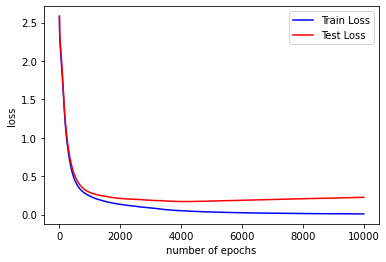

In [35]:
fig = plt.figure()
plt.plot(range(0, no_epochs), train_losses, color='blue')
plt.plot(range(0, no_epochs), test_losses, color='red')
plt.legend(['Train Loss', "Test Loss"], loc='upper right')
plt.xlabel('number of epochs')
plt.ylabel('loss')

### 4. Model Evaluation

Finally, we check the model accuracy on the test data. For this we predict on the test data, identify the class with the highest score and compare it to the true label.

In [36]:
net.eval() # set network to evaluation mode
y_pred = net(test_x)
_, predicted = torch.max(y_pred.data, 1)
correct = (predicted == test_y).sum().item()
print(f"Accuarcy is {100. * correct / len(test_x)}%")

Accuarcy is 95.83333333333333%


### 5. Tasks

1. Our accuracy is not so good on the test data. Try the following to improve the model:
    - Increase the hidden layer size to 10 neurons, train the model and compare the accuracy on the test data.
    - Add a second hidden layer with 5 neurons, train the model and compare the accuracy on the test data.
2. Check if you can decrease the training loss even further if you train for more epochs. However, this can easily result in overfitting. To check that, calculate the accuracy on the test data already during training after each epoch. Show the plot the results as a second plot similiar to the one above. (Note: Normally we need to do this check on seperate validation data, not on our test data).
3. Take the titanic data set and try to train a neural network on it.

Solutions:
1. Accuracy can be improved to 81%
2. We can see that test loss does not get better after 2000 epochs

3. Titanic data

In [25]:
import pandas as pd
df = pd.read_csv("../data/titanic.csv")
df_selection = df[["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]]
df_selection = df_selection.dropna()

In [61]:
df_X = df_selection.drop(columns = ["Survived"]).values
df_y = df_selection["Survived"].values
train_x, test_x, train_y, test_y = train_test_split(df_X, df_y, test_size=0.2, random_state=0)

What is important above is that we transform the Pandas objects into numpy nd-arrays by applying the `.values`, because PyTorch does not really like to create tensors out of Pandas DataFrames or Series.

In [65]:
train_x = torch.Tensor(train_x).float().to(device)
test_x = torch.Tensor(test_x).float().to(device)
train_y = torch.Tensor(train_y).long().to(device)
test_y = torch.Tensor(test_y).long().to(device)

In [66]:
class TitanicNet(nn.Module):
  def __init__(self):
    super(TitanicNet, self).__init__()
    self.hidden = nn.Linear(5, 10)
    self.output = nn.Linear(10, 2)

  def forward(self, x):
    z = F.relu(self.hidden(x))
    z = self.output(z)  # no softmax. see CrossEntropyLoss() 
    return z

In [67]:
net = TitanicNet().to(device)
net.train()

# define the parameters for training
no_epochs = 10000
learning_rate = 0.01
loss_func = nn.CrossEntropyLoss()  # applies softmax() internally
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

print("\nStarting training ")

train_losses = []
test_losses = []
for epoch in range(0, no_epochs):

  optimizer.zero_grad()
  output = net(train_x)

  loss = loss_func(output, train_y)
  loss.backward()
  optimizer.step()

  y_test = net(test_x)
  loss_test = loss_func(y_test, test_y)

  train_losses.append(loss.item())
  test_losses.append(loss_test.item())
  
  if epoch % 100 == 0:
    print(f"Loss in epoch {epoch} is {loss.item()}")

print("Done training ")


Starting training 
Loss in epoch 0 is 1.8526724576950073
Loss in epoch 100 is 0.6327638626098633
Loss in epoch 200 is 0.6152629852294922
Loss in epoch 300 is 0.6076704263687134
Loss in epoch 400 is 0.603749692440033
Loss in epoch 500 is 0.6010717749595642
Loss in epoch 600 is 0.5991060733795166
Loss in epoch 700 is 0.5978813767433167
Loss in epoch 800 is 0.5974206924438477
Loss in epoch 900 is 0.5960420966148376
Loss in epoch 1000 is 0.5946744084358215
Loss in epoch 1100 is 0.5930956602096558
Loss in epoch 1200 is 0.5918411016464233
Loss in epoch 1300 is 0.5908036828041077
Loss in epoch 1400 is 0.5901950001716614
Loss in epoch 1500 is 0.5890573859214783
Loss in epoch 1600 is 0.5882608890533447
Loss in epoch 1700 is 0.5875867009162903
Loss in epoch 1800 is 0.5863486528396606
Loss in epoch 1900 is 0.5839777588844299
Loss in epoch 2000 is 0.5837767124176025
Loss in epoch 2100 is 0.5833257436752319
Loss in epoch 2200 is 0.5835000872612
Loss in epoch 2300 is 0.5820655226707458
Loss in epoc

Text(0, 0.5, 'loss')

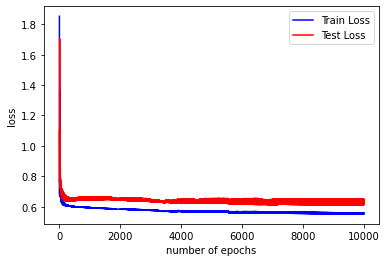

In [68]:
fig = plt.figure()
plt.plot(range(0, no_epochs), train_losses, color='blue')
plt.plot(range(0, no_epochs), test_losses, color='red')
plt.legend(['Train Loss', "Test Loss"], loc='upper right')
plt.xlabel('number of epochs')
plt.ylabel('loss')

In [69]:
y_pred = net(test_x)
_, predicted = torch.max(y_pred.data, 1)
correct = (predicted == test_y).sum().item()
print(f"Accuarcy is {100. * correct / len(test_x)}%")

Accuarcy is 71.32867132867133%
